In [91]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras import utils, layers, models


# Loading datasets

In [92]:
# Load images from the directories
train_dataset = utils.image_dataset_from_directory("train",
                                                                      seed=123,
                                                                      image_size=(256,256),
                                                                      batch_size=32)

test_dataset = utils.image_dataset_from_directory("test",
                                                                      seed=123,
                                                                      image_size=(256,256),
                                                                      batch_size=32)

# Labels
training_labels = train_dataset.class_names
training_labels = train_dataset.class_names

"""
# Performance tuning
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)
"""

Found 9835 files belonging to 12 classes.
Found 2424 files belonging to 12 classes.


'\n# Performance tuning\nAUTOTUNE = tf.data.experimental.AUTOTUNE\ntrain_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)\ntest_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)\n'

# Architecture of Model

In [93]:
# Defining
model = models.Sequential([
    # Convolution Layers
    layers.Conv2D(filters =32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters =64, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters =128, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters =256, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),
    
    # Nural Network Layer
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(12, activation='softmax')
])

# Compile 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training


In [94]:
model.fit(train_dataset, epochs=1, batch_size=32)

308/308 [==============================] - 217s 704ms/step - loss: 1.6281 - accuracy: 0.7453


# Test

In [95]:
loss, accuracy = model.evaluate(
    test_dataset
)

76/76 [==============================] - 14s 184ms/step - loss: 1.4264 - accuracy: 0.6300


In [96]:
print(f"Loss:{loss}\nAccuracy:{accuracy*100}%")

Loss:1.426369547843933
Accuracy:62.995052337646484%


In [97]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))



1/1 [==============================] - 0s 183ms/step


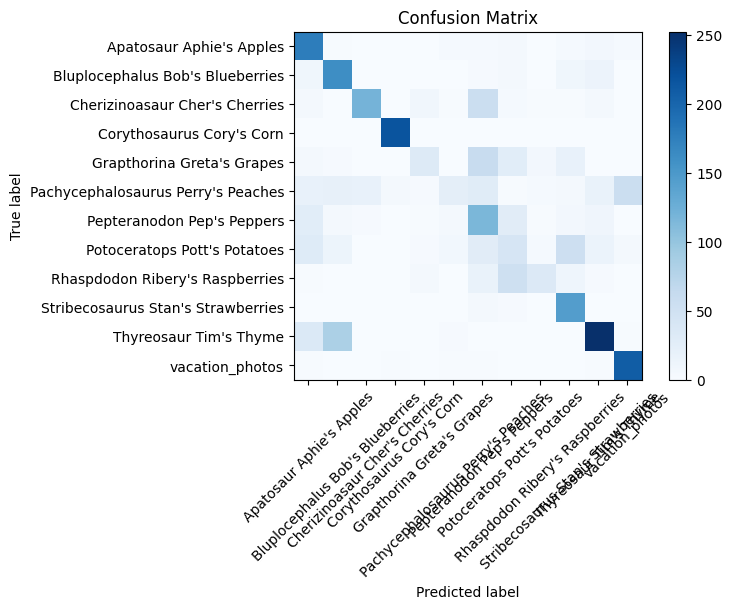


Classification Report:
                                    precision    recall  f1-score   support

          Apatosaur Aphie's Apples       0.57      0.89      0.70       200
  Bluplocephalus Bob's Blueberries       0.56      0.81      0.66       200
    Cherizinoasaur Cher's Cherries       0.86      0.60      0.71       200
         Corythosaurus Cory's Corn       0.98      1.00      0.99       217
        Grapthorina Greta's Grapes       0.64      0.21      0.32       150
Pachycephalosaurus Perry's Peaches       0.57      0.12      0.20       199
        Pepteranodon Pep's Peppers       0.37      0.58      0.45       200
      Potoceratops Pott's Potatoes       0.26      0.21      0.23       200
   Rhaspdodon Ribery's Raspberries       0.71      0.28      0.40       122
Stribecosaurus Stan's Strawberries       0.57      0.96      0.72       150
            Thyreosaur Tim's Thyme       0.78      0.68      0.73       373
                   vacation_photos       0.76      0.98      0.

In [98]:
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=training_labels)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(training_labels))
plt.xticks(tick_marks, training_labels, rotation=45)
plt.yticks(tick_marks, training_labels)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("\nClassification Report:")
print(class_report)

In [99]:
model.save("image_Classifier.model")

INFO:tensorflow:Assets written to: image_Classifier.model/assets


INFO:tensorflow:Assets written to: image_Classifier.model/assets
